# Finding "Michelin Quality" Restaurants in Hong Kong

In [539]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import csv
from bs4 import BeautifulSoup
import time

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Eric\Anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          57 KB

The following packages will be UPDATED:

  geopy                                         1.19.0-py_0 --> 1.20.0-py_0




geopy-1.20.0         | 57 KB     |            |   0% 
geopy-1.20.0         | 57 KB     | ##         |  21% 
geopy-1.20.0         | 57 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Solving environment: ...working... done

# All requested packages already installed.

Fol

## **Important: You may need to upload the three CSV files in the folder for this program to work especially if you experience Foursquare connection to the venue ID's being disrupted during the process.**

## I. Get Michelin winners list - Star Restaurants

In [553]:
base_url  = 'https://guide.michelin.com/hk/en/hong-kong-region/hong-kong/restaurants/3-stars-michelin/2-stars-michelin/1-star-michelin/page/'

i=0
star_lat=[]
star_long=[]
star_name=[]
star_Cuisine = []
award = []

while (i < 4):
    i=i+1
    url = '{}{}'.format(base_url, i)
    print(url)
    source = requests.get(url).text
    soup = BeautifulSoup(source,'lxml')
    star_result = soup.find('div',class_="row js-toggle-result pt-0")
    star_content = star_result.findAll('div',class_="col-md-6 col-lg-6 col-xl-4")
    stars = star_content[0]
    for stars in star_content:
        star_lat.append(float(stars.div['data-lat']))
        star_long.append(float(stars.div['data-lng']))
        star_name.append(stars.div.h5.a.text.split('\n')[1])
        star_Cuisine.append(stars.find('div', {"class":"card__menu-footer--price"}).text.strip().split('·', 1)[0])
        award.append('Star')
star_data = pd.DataFrame(data=[star_name, star_Cuisine, star_lat, star_long, award]).transpose()
star_data.columns = ['Name', 'Cuisine', 'Latitude', 'Longitude', 'Award']

https://guide.michelin.com/hk/en/hong-kong-region/hong-kong/restaurants/3-stars-michelin/2-stars-michelin/1-star-michelin/page/1
https://guide.michelin.com/hk/en/hong-kong-region/hong-kong/restaurants/3-stars-michelin/2-stars-michelin/1-star-michelin/page/2
https://guide.michelin.com/hk/en/hong-kong-region/hong-kong/restaurants/3-stars-michelin/2-stars-michelin/1-star-michelin/page/3
https://guide.michelin.com/hk/en/hong-kong-region/hong-kong/restaurants/3-stars-michelin/2-stars-michelin/1-star-michelin/page/4


In [554]:
print(star_data.shape)
star_data.head()

(63, 5)


,Name,Cuisine,Latitude,Longitude,Award
0,Loaf On,Cantonese,22.3799,114.272,Star
1,Lei Garden (Kwun Tong),Cantonese,22.3127,114.225,Star
2,Tim Ho Wan (Sham Shui Po),Dim Sum,22.3281,114.167,Star
3,Lei Garden (Mong Kok),Cantonese,22.3202,114.171,Star
4,Ming Court,Cantonese,22.3183,114.169,Star


## II. Get Michelin winners list - Bib Gourment Restaurants

In [556]:
base_url  = 'https://guide.michelin.com/hk/en/hong-kong-region/hong-kong/restaurants/bib-gourmand/page/'

i=0
bib_lat=[]
bib_long=[]
bib_name=[]
bib_Cuisine = []
award = []

while (i < 4):
    i=i+1
    url = '{}{}'.format(base_url, i)
    print(url)
    source = requests.get(url).text
    soup = BeautifulSoup(source,'lxml')
    bib_result = soup.find('div',class_="row js-toggle-result pt-0")
    bib_content = bib_result.findAll('div',class_="col-md-6 col-lg-6 col-xl-4")
    bibs = bib_content[0]
    for bibs in bib_content:
        bib_lat.append(float(bibs.div['data-lat']))
        bib_long.append(float(bibs.div['data-lng']))
        bib_name.append(bibs.div.h5.a.text.split('\n')[1])
        bib_Cuisine.append(bibs.find('div', {"class":"card__menu-footer--price"}).text.strip().split('·', 1)[0])
        award.append('Bib Gourment')
bib_data = pd.DataFrame(data=[bib_name, bib_Cuisine, bib_lat, bib_long, award]).transpose()
bib_data.columns = ['Name', 'Cuisine', 'Latitude', 'Longitude', 'Award']

https://guide.michelin.com/hk/en/hong-kong-region/hong-kong/restaurants/bib-gourmand/page/1
https://guide.michelin.com/hk/en/hong-kong-region/hong-kong/restaurants/bib-gourmand/page/2
https://guide.michelin.com/hk/en/hong-kong-region/hong-kong/restaurants/bib-gourmand/page/3
https://guide.michelin.com/hk/en/hong-kong-region/hong-kong/restaurants/bib-gourmand/page/4


In [557]:
print(bib_data.shape)
bib_data.head()

(71, 5)


,Name,Cuisine,Latitude,Longitude,Award
0,Tai Wing Wah,Cantonese,22.4462,114.029,Bib Gourment
1,Ho To Tai (Yuen Long),Noodles,22.4438,114.029,Bib Gourment
2,Yue Kee,Cantonese,22.3682,114.06,Bib Gourment
3,Kwan Kee Bamboo Noodles (Cheun...,Noodles,22.3372,114.158,Bib Gourment
4,Lucky Indonesia,Indonesian,22.3158,114.223,Bib Gourment


## III. Show the full Michelin winners list on the Hong Kong Map

#### a. Combine the Star list and the Bib list for the full 134 restaurants

In [558]:
michelin_data = [star_data, bib_data]
michelin_all = pd.concat(michelin_data, ignore_index=True)
print(michelin_all.shape)
michelin_all.head()

(134, 5)


,Name,Cuisine,Latitude,Longitude,Award
0,Loaf On,Cantonese,22.3799,114.272,Star
1,Lei Garden (Kwun Tong),Cantonese,22.3127,114.225,Star
2,Tim Ho Wan (Sham Shui Po),Dim Sum,22.3281,114.167,Star
3,Lei Garden (Mong Kok),Cantonese,22.3202,114.171,Star
4,Ming Court,Cantonese,22.3183,114.169,Star


#### b. Show Star Restaurants in Red, and Bib Restaurants in Blue

In [559]:
address = 'Hong Kong, HK'

geolocator = Nominatim(user_agent="hk_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hong Kong is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hong Kong is 22.350627, 114.1849161.


In [560]:
# create map of HK using latitude and longitude values
michelinmap_hk = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, restaurant in zip(bib_data['Latitude'], bib_data['Longitude'], bib_data['Name']):
    label = '{}'.format(restaurant)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(michelinmap_hk)

for lat, lng, restaurant in zip(star_data['Latitude'], star_data['Longitude'], star_data['Name']):
    label = '{}'.format(restaurant)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FF0000',
        fill_opacity=0.7,
        parse_html=False).add_to(michelinmap_hk)
    
michelinmap_hk

## IV. Find matching Venue ID in Foursquare

### a) Use coordinates provided by Michelin to find venues nearby

In [561]:
CLIENT_ID = 'SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4' # your Foursquare ID
CLIENT_SECRET = '533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4
CLIENT_SECRET:533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P


In [569]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [570]:
def getNearbyVenues(names, latitudes, longitudes, radius=200, limit=150):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['id'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude',
                  'Venue_ID',           
                  'Venue_Category']
    
    return(nearby_venues)

In [571]:
# type your answer here

Find_ID = getNearbyVenues(names=michelin_all['Name'],
                                    latitudes=michelin_all['Latitude'],
                                   longitudes=michelin_all['Longitude']
                                  )


### A total of 3145 venues were found nearby the Michelin coordinates

In [578]:
print(Find_ID.shape)
Find_ID.head()

(3145, 8)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_ID,Venue_Category
0,Loaf On,22.379858,114.27188,Loaf On (六福菜館),22.379852,114.272226,4c1371bf583c9c74ee6d3fa4,Chinese Restaurant
1,Loaf On,22.379858,114.27188,The Bottle Shop,22.380181,114.272724,50b02fbbe4b0441cd8d87bfb,Wine Shop
2,Loaf On,22.379858,114.27188,Sai Kung Market (西貢街市),22.380541,114.272112,4c1db378fcf8c9b6b649ac0b,Market
3,Loaf On,22.379858,114.27188,Little Cove Espresso,22.379613,114.271835,5641b617498e385faf1c93cb,Coffee Shop
4,Loaf On,22.379858,114.27188,AJ's Sri Lankan Cuisine (AJ's 斯里蘭卡菜館),22.379363,114.271335,4b7a84d3f964a5209b2f2fe3,Sri Lankan Restaurant


### b) Due to inconsistent language formats and Chinese names used in Foursquare, the name matching  need to be done manually

In [579]:
Find_ID.to_csv(r'C:\Users\Eric\Documents\IBM SQL\Data Science Capstone\Find_ID.csv', encoding='utf-8', index=False)

### The newly processed data called Michelin_4Square_ID now contain the Michelin restaurants with the matching name and venue ID's

In [567]:
Michelin_4SquareID = pd.read_csv('Micheline_4Square_ID_HK.csv')

### During the restaurant seeking process, only 83 out of the 134 Michelin restaurants were found on Foursquare.  This may be due to various reasons such as restaurant not resgistered on Foursquare, restaurant closed, name of restaurant changed, etc.

### To ensure we have sufficient sample size, we will combine Michelin Star and Michelin Bib together for analysis, rather than analyze them separately.

In [568]:
Michelin_ID = Michelin_4SquareID.drop(['Neighborhood', 'Neighborhood_Latitude', 'Neighborhood_Longitude'], axis=1)
Michelin_ID = Michelin_ID.drop_duplicates()
print(Michelin_ID.shape)
Michelin_ID.head()

(83, 6)


,Venue,Venue_Latitude,Venue_Longitude,Venue_ID,Venue_Category,Marker
0,Loaf On (六福菜館),22.379852,114.272226,4c1371bf583c9c74ee6d3fa4,Chinese Restaurant,1
1,Lei Garden Restaurant (利苑酒家),22.312911,114.225371,4b973158f964a520a8fb34e3,Chinese Restaurant,1
2,Tim Ho Wan (添好運),22.328987,114.166320,4bfe9d38ac039521c6d4a880,Dim Sum Restaurant,1
3,Ming Court (明閣),22.318420,114.168253,4bbffe322a89ef3bb107f088,Cantonese Restaurant,1
4,Yat Tung Heen (逸東軒),22.308314,114.171525,4d0d6df8e0b98cfa65f1db93,Cantonese Restaurant,1


## V. Explore the Foursquare Venue Data

### a) Study the Foursquare data for one of the Michelin restaurants: IM Teppanyaki & Wine 

In [363]:
# venue_id = '5210554c11d23c1abad7f8b5' # ID of IM Teppanyaki & Wine
venue_id = '5210554c11d23c1abad7f8b5'
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/5210554c11d23c1abad7f8b5?client_id=SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4&client_secret=533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P&v=20180604'

In [364]:
results = requests.get(url).json()
# print(results['response']['venue'].keys())
results['response']

#print(result['response']['venue'].keys())
#result['response']['venue']

{'venue': {'id': '5210554c11d23c1abad7f8b5',
  'name': 'I M Teppanyaki & Wine',
  'contact': {'phone': '+85225707088', 'formattedPhone': '+852 2570 7088'},
  'location': {'address': '134 Tung Lo Wan Rd',
   'lat': 22.280826564769843,
   'lng': 114.19213243606188,
   'labeledLatLngs': [{'label': 'display',
     'lat': 22.280826564769843,
     'lng': 114.19213243606188}],
   'cc': 'HK',
   'country': '香港',
   'formattedAddress': ['134 Tung Lo Wan Rd', '香港']},
  'canonicalUrl': 'https://foursquare.com/v/i-m-teppanyaki--wine/5210554c11d23c1abad7f8b5',
  'categories': [{'id': '4bf58dd8d48988d111941735',
    'name': 'Japanese Restaurant',
    'pluralName': 'Japanese Restaurants',
    'shortName': 'Japanese',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_',
     'suffix': '.png'},
    'primary': True}],
  'verified': False,
  'stats': {'tipCount': 5},
  'url': 'http://www.imteppanyaki.com',
  'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'},
  'likes

### b) Identify the following data that may be used for further analysis

In [574]:
name = []
cuisine = []
rating = []
likes = []
dislikes = []
tips = [] # no. of tips
photos = [] # no. of photos
listed = [] # similar to my favorite
price = [] # three price levels 1, 2, 3, where 3 being the most expensive
beenHere = []
reasons = []
area = []

In [575]:

name.append(results['response']['venue']['name'])
cuisine.append(results['response']['venue']['categories'][0]['name'])
try:
    rating.append(results['response']['venue']['rating'])
except:
    rating.append(7.77)
likes.append(results['response']['venue']['likes']['count'])
dislikes.append(results['response']['venue']['dislike'])
tips.append(results['response']['venue']['tips']['count'])
photos.append(results['response']['venue']['photos']['count'])
listed.append(results['response']['venue']['listed']['count'])
try:
    price.append(results['response']['venue']['price']['tier'])
except:
    price.append(0)
beenHere.append(results['response']['venue']['beenHere']['count'])
reasons.append(results['response']['venue']['reasons']['count'])
try:
    area.append(results['response']['venue']['location']['city'])
except:
    area.append("")
print(name, cuisine, rating, likes, dislikes, tips, photos, listed, price, beenHere, reasons, area)

['I M Teppanyaki & Wine'] ['Japanese Restaurant'] [8.3] [17] [False] [5] [49] [39] [2] [0] [0] ['']


#### Some data show empty or False. Need to study further to decide whether to drop the data or force fill the data with a mean value 

## VI. Find Venue Data of All Michelin Awarded Restaurants

In [68]:

name = []
cuisine = []
rating = []
likes = []
dislikes = []
tips = []
photos = []
listed = []
price = []
beenHere = []
reasons = []
area = []

n=0

# range(0, len(Michelin_ID)):

for n in range(0, len(Michelin_ID)):
    LIMIT = 30
    venue_id = Michelin_ID['Venue_ID'][n]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    print(url)
    n=n+1
    result = requests.get(url).json()
    name.append(result['response']['venue']['name'])
    cuisine.append(result['response']['venue']['categories'][0]['name'])
    try:
        rating.append(result['response']['venue']['rating'])
    except:
        rating.append(7.77)
    likes.append(result['response']['venue']['likes']['count'])
    dislikes.append(result['response']['venue']['dislike'])
    tips.append(result['response']['venue']['tips']['count'])
    photos.append(result['response']['venue']['photos']['count'])
    listed.append(result['response']['venue']['listed']['count'])
    try:
        price.append(result['response']['venue']['price']['tier'])
    except:
        price.append(0)
    beenHere.append(result['response']['venue']['beenHere']['count'])
    reasons.append(result['response']['venue']['reasons']['count'])
    try:
        area.append(result['response']['venue']['location']['city'])
    except:
        area.append("")

stats_data = pd.DataFrame(data=[name, cuisine, rating, likes, dislikes, tips, photos, listed, price, beenHere, reasons, area]).transpose()
stats_data.columns = ['Name', 'Cuisine', 'Rating', 'Likes', 'Dislike','Tips','Photos','Listed','Price Level','BeenHere','Reasons','Area']

https://api.foursquare.com/v2/venues/4c1371bf583c9c74ee6d3fa4?client_id=SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4&client_secret=533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P&v=20180604
https://api.foursquare.com/v2/venues/4b973158f964a520a8fb34e3?client_id=SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4&client_secret=533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P&v=20180604
https://api.foursquare.com/v2/venues/4bfe9d38ac039521c6d4a880?client_id=SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4&client_secret=533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P&v=20180604
https://api.foursquare.com/v2/venues/4bbffe322a89ef3bb107f088?client_id=SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4&client_secret=533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P&v=20180604
https://api.foursquare.com/v2/venues/4d0d6df8e0b98cfa65f1db93?client_id=SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4&client_secret=533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P&v=20180604
https://api.foursquare.co

In [69]:
Michelin_stats = pd.DataFrame(data=[name, cuisine, rating, likes, dislikes, tips, photos, listed, price, beenHere, reasons, area]).transpose()
Michelin_stats.columns = ['Name', 'Cuisine', 'Rating', 'Likes', 'Dislike','Tips','Photos','Listed','Price Level','Been Here','Reasons','Area']

In [72]:
Michelin_stats.head()

,Name,Cuisine,Rating,Likes,Dislike,Tips,Photos,Listed,Price Level,Been Here,Reasons,Area
0,Loaf On (六福菜館),Chinese Restaurant,8.5,42,False,22,129,127,1,0,1,西貢
1,Lei Garden Restaurant (利苑酒家),Chinese Restaurant,7.4,14,False,5,41,7,1,0,0,观塘
2,Tim Ho Wan (添好運),Dim Sum Restaurant,8.2,300,False,135,902,804,2,0,1,Sham Shui Po
3,Ming Court (明閣),Cantonese Restaurant,7.7,74,False,49,309,219,0,0,1,Mong Kok
4,Yat Tung Heen (逸東軒),Cantonese Restaurant,6.9,18,False,13,77,19,0,0,0,油麻地


In [71]:
Michelin_stats.to_csv(r'C:\Users\Eric\Documents\IBM SQL\Data Science Capstone\Michelin_stats.csv', encoding='utf-8', index=False)

### After studying the data, the columns "Dislike", "BeenHere", and "Reasons" shows no valuable data or the same across all restaurants.  We will drop them in further processing.

## VII. Find Venue Data of the Non Michelin Awarded Restaurants nearby

### a) Get All ID's from the Full list

In [577]:
Finding_ID = Find_ID

In [580]:
print(Finding_ID.shape)
Finding_ID.head()

(3145, 8)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_ID,Venue_Category
0,Loaf On,22.379858,114.27188,Loaf On (六福菜館),22.379852,114.272226,4c1371bf583c9c74ee6d3fa4,Chinese Restaurant
1,Loaf On,22.379858,114.27188,The Bottle Shop,22.380181,114.272724,50b02fbbe4b0441cd8d87bfb,Wine Shop
2,Loaf On,22.379858,114.27188,Sai Kung Market (西貢街市),22.380541,114.272112,4c1db378fcf8c9b6b649ac0b,Market
3,Loaf On,22.379858,114.27188,Little Cove Espresso,22.379613,114.271835,5641b617498e385faf1c93cb,Coffee Shop
4,Loaf On,22.379858,114.27188,AJ's Sri Lankan Cuisine (AJ's 斯里蘭卡菜館),22.379363,114.271335,4b7a84d3f964a5209b2f2fe3,Sri Lankan Restaurant


### b) Select "Restaurant" Category and Drop unnecessary data from the ID list

In [582]:
All_ID = Finding_ID[Finding_ID['Venue_Category'].astype(str).str.contains('Restaurant')]
All_ID = All_ID.drop(['Neighborhood', 'Neighborhood_Latitude', 'Neighborhood_Longitude'], axis=1)
All_ID = All_ID.drop_duplicates()
print(All_ID.shape)
All_ID.head()

(616, 5)


,Venue,Venue_Latitude,Venue_Longitude,Venue_ID,Venue_Category
0,Loaf On (六福菜館),22.379852,114.272226,4c1371bf583c9c74ee6d3fa4,Chinese Restaurant
4,AJ's Sri Lankan Cuisine (AJ's 斯里蘭卡菜館),22.379363,114.271335,4b7a84d3f964a5209b2f2fe3,Sri Lankan Restaurant
5,Chuen Kee Seafood Restaurant (全記海鮮菜館),22.380751,114.273345,4bb87186314e95214f72489d,Seafood Restaurant
7,Sing Kee Seafood Restaurant 勝記海鮮酒家,22.379198,114.270490,4c5beec37735c9b643cf8a72,Seafood Restaurant
9,CASA TAPAS BAR,22.381086,114.273251,520767dc11d2abbef5b4a8b9,Tapas Restaurant


In [583]:
All_ID_Only = All_ID.drop(['Venue', 'Venue_Latitude','Venue_Longitude','Venue_Category'], axis=1)
All_ID_Only = All_ID_Only.drop_duplicates()

In [584]:
print(All_ID_Only.shape)
All_ID_Only.head()

(616, 1)


,Venue_ID
0,4c1371bf583c9c74ee6d3fa4
4,4b7a84d3f964a5209b2f2fe3
5,4bb87186314e95214f72489d
7,4c5beec37735c9b643cf8a72
9,520767dc11d2abbef5b4a8b9


### c) Create the ID list for Non-Michelin restaurants

In [585]:
Michelin_ID_Only = Michelin_ID.drop('Marker', axis=1)
Michelin_ID_Only = Michelin_ID_Only.drop(['Venue', 'Venue_Latitude','Venue_Longitude','Venue_Category'], axis=1)
print(Michelin_ID_Only.shape)
Michelin_ID_Only.head()

(83, 1)


,Venue_ID
0,4c1371bf583c9c74ee6d3fa4
1,4b973158f964a520a8fb34e3
2,4bfe9d38ac039521c6d4a880
3,4bbffe322a89ef3bb107f088
4,4d0d6df8e0b98cfa65f1db93


In [586]:
No_Michelin_ID = pd.merge(All_ID, Michelin_ID_Only, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [587]:
No_Michelin_ID.to_csv(r'C:\Users\Eric\Documents\IBM SQL\Data Science Capstone\No_Michelin_ID.csv', encoding='utf-8', index=False)

#### A total of 545 Non-Michelin restaurants were found nearby

In [595]:
print(No_Michelin_ID.shape)
No_Michelin_ID.head()

(545, 5)


,Venue,Venue_Latitude,Venue_Longitude,Venue_ID,Venue_Category
1,AJ's Sri Lankan Cuisine (AJ's 斯里蘭卡菜館),22.379363,114.271335,4b7a84d3f964a5209b2f2fe3,Sri Lankan Restaurant
2,Chuen Kee Seafood Restaurant (全記海鮮菜館),22.380751,114.273345,4bb87186314e95214f72489d,Seafood Restaurant
3,Sing Kee Seafood Restaurant 勝記海鮮酒家,22.379198,114.270490,4c5beec37735c9b643cf8a72,Seafood Restaurant
4,CASA TAPAS BAR,22.381086,114.273251,520767dc11d2abbef5b4a8b9,Tapas Restaurant
5,Piccolos,22.381280,114.271950,4f1952b5e4b00583e7d64b04,Italian Restaurant


## VIII. Obtain Venue Data from the Non-Michelin Restaurants

In [596]:
name = []
cuisine = []
rating = []
likes = []
dislikes = []
tips = []
photos = []
listed = []
price = []
beenHere = []
reasons = []
area = []

In [606]:

# range(1, len(No_Michelin_ID)):

for n in range(1, len(No_Michelin_ID)):
    LIMIT = 30
    venue_id = No_Michelin_ID['Venue_ID'][n]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    print(url)
    time.sleep(2)
    n=n+1
    result = requests.get(url).json()
    name.append(result['response']['venue']['name'])
    cuisine.append(result['response']['venue']['categories'][0]['name'])
    try:
        rating.append(result['response']['venue']['rating'])
    except:
        rating.append(7.77)
    try:
        likes.append(result['response']['venue']['likes']['count'])
    except:
        likes.append(0)
    dislikes.append(result['response']['venue']['dislike'])
    tips.append(result['response']['venue']['tips']['count'])
    photos.append(result['response']['venue']['photos']['count'])
    listed.append(result['response']['venue']['listed']['count'])
    try:
        price.append(result['response']['venue']['price']['tier'])
    except:
        price.append(0)
    beenHere.append(result['response']['venue']['beenHere']['count'])
    reasons.append(result['response']['venue']['reasons']['count'])
    try:
        area.append(result['response']['venue']['location']['city'])
    except:
        area.append("")
    no_michelin_data = pd.DataFrame(data=[name, cuisine, rating, likes, dislikes, tips, photos, listed, price, beenHere, reasons, area]).transpose()

no_michelin_data.columns = ['Name', 'Cuisine', 'Rating', 'Likes', 'Dislike','Tips','Photos','Listed','Price Level','BeenHere','Reasons','Area']

https://api.foursquare.com/v2/venues/4b2b8a8bf964a5205cb724e3?client_id=SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4&client_secret=533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P&v=20180604
https://api.foursquare.com/v2/venues/4c0e2babb1b676b00592e186?client_id=SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4&client_secret=533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P&v=20180604
https://api.foursquare.com/v2/venues/4bf343dd2d6295219bf05f58?client_id=SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4&client_secret=533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P&v=20180604
https://api.foursquare.com/v2/venues/58537c8a809a770330b58f04?client_id=SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4&client_secret=533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P&v=20180604
https://api.foursquare.com/v2/venues/5724abb7498e8f4ce1872b8e?client_id=SSXUP3QXWQI3VDJK3N0ZOLKS0DVXHDY4JEOZCHFOK0LAOYJ4&client_secret=533GEQXRAH5HM0ROHPEZT0ENXKQZJC43034TL2TYHSUAJM1P&v=20180604
https://api.foursquare.co

### For unknown reasons, Foursquare presents error for many venue ID's that it provides, causing many interruptions during the GET process.

In [393]:
no_michelin_data.to_csv(r'C:\Users\Eric\Documents\IBM SQL\Data Science Capstone\no_michelin_data2.csv', encoding='utf-8', index=False)

### Therefore, we had to re-loop it manually and save them in case data get lost

In [607]:
no_michelin_data = pd.read_csv('no_michelin_data_all.csv')

### Eventually, we got a combined list with 640 venue data, where some are duplicated

In [608]:
print(no_michelin_data.shape)
no_michelin_data.head()

(640, 12)


,Name,Cuisine,Rating,Likes,Dislike,Tips,Photos,Listed,Price Level,BeenHere,Reasons,Area
0,Tam Chai Yunnan Noodles (譚仔雲南米線),Chinese Restaurant,7.6,6,False,3,16,4,1,0,0,旺角
1,Market Hotpot (鮮入圍煮),Hotpot Restaurant,7.3,16,False,6,89,28,0,0,0,香港
2,The Great Restaurant (一品雞煲火鍋),Hotpot Restaurant,7.2,10,False,1,15,3,0,0,0,旺角
3,Peking Garden (北京樓),Beijing Restaurant,7.5,30,False,12,110,5,0,0,0,香港
4,Minh & Kok,Vietnamese Restaurant,7.3,8,False,2,38,0,2,0,0,太古城


### The final list after dropping duplicates contain 484 out of the original 540+ restaurants.  The sample size is still OK to work with.

In [609]:
no_michelin_stats = no_michelin_data
no_michelin_stats = no_michelin_stats.drop_duplicates()
# no_michelin_stats.index = pd.RangeIndex(len(no_michelin_stats.index)
no_michelin_stats = no_michelin_stats.assign(Michelin = 0)
print(no_michelin_stats.shape)
no_michelin_stats.head()

(484, 13)


,Name,Cuisine,Rating,Likes,Dislike,Tips,Photos,Listed,Price Level,BeenHere,Reasons,Area,Michelin
0,Tam Chai Yunnan Noodles (譚仔雲南米線),Chinese Restaurant,7.6,6,False,3,16,4,1,0,0,旺角,0
1,Market Hotpot (鮮入圍煮),Hotpot Restaurant,7.3,16,False,6,89,28,0,0,0,香港,0
2,The Great Restaurant (一品雞煲火鍋),Hotpot Restaurant,7.2,10,False,1,15,3,0,0,0,旺角,0
3,Peking Garden (北京樓),Beijing Restaurant,7.5,30,False,12,110,5,0,0,0,香港,0
4,Minh & Kok,Vietnamese Restaurant,7.3,8,False,2,38,0,2,0,0,太古城,0


In [413]:
# no_michelin_stats.to_csv(r'C:\Users\Eric\Documents\IBM SQL\Data Science Capstone\no_michelin_stats.csv', encoding='utf-8', index=False)

## VIII. Preprocessing Venue Data for all restaurants

In [610]:
michelin_stats = pd.read_csv('Michelin_stats.csv')
michelin_stats.head()

,Name,Cuisine,Rating,Likes,Dislike,Tips,Photos,Listed,Price Level,Been Here,Reasons,Area
0,Loaf On (六福菜館),Chinese Restaurant,8.5,42,False,22,129,127,1,0,1,西貢
1,Lei Garden Restaurant (利苑酒家),Chinese Restaurant,7.4,14,False,5,41,7,1,0,0,观塘
2,Tim Ho Wan (添好運),Dim Sum Restaurant,8.2,300,False,135,902,804,2,0,1,Sham Shui Po
3,Ming Court (明閣),Cantonese Restaurant,7.7,74,False,49,309,219,0,0,1,Mong Kok
4,Yat Tung Heen (逸東軒),Cantonese Restaurant,6.9,18,False,13,77,19,0,0,0,油麻地


In [611]:
michelin_stats['Michelin'] = 1
print(michelin_stats.shape)
michelin_stats.head()

(83, 13)


,Name,Cuisine,Rating,Likes,Dislike,Tips,Photos,Listed,Price Level,Been Here,Reasons,Area,Michelin
0,Loaf On (六福菜館),Chinese Restaurant,8.5,42,False,22,129,127,1,0,1,西貢,1
1,Lei Garden Restaurant (利苑酒家),Chinese Restaurant,7.4,14,False,5,41,7,1,0,0,观塘,1
2,Tim Ho Wan (添好運),Dim Sum Restaurant,8.2,300,False,135,902,804,2,0,1,Sham Shui Po,1
3,Ming Court (明閣),Cantonese Restaurant,7.7,74,False,49,309,219,0,0,1,Mong Kok,1
4,Yat Tung Heen (逸東軒),Cantonese Restaurant,6.9,18,False,13,77,19,0,0,0,油麻地,1


In [612]:
frames = [michelin_stats, no_michelin_stats]
all_stats = pd.concat(frames, sort = False)
print(all_stats.shape)
all_stats.head()

(567, 14)


,Name,Cuisine,Rating,Likes,Dislike,Tips,Photos,Listed,Price Level,Been Here,Reasons,Area,Michelin,BeenHere
0,Loaf On (六福菜館),Chinese Restaurant,8.5,42,False,22,129,127,1,0.0,1,西貢,1,NaN
1,Lei Garden Restaurant (利苑酒家),Chinese Restaurant,7.4,14,False,5,41,7,1,0.0,0,观塘,1,NaN
2,Tim Ho Wan (添好運),Dim Sum Restaurant,8.2,300,False,135,902,804,2,0.0,1,Sham Shui Po,1,NaN
3,Ming Court (明閣),Cantonese Restaurant,7.7,74,False,49,309,219,0,0.0,1,Mong Kok,1,NaN
4,Yat Tung Heen (逸東軒),Cantonese Restaurant,6.9,18,False,13,77,19,0,0.0,0,油麻地,1,NaN


In [613]:
### Translate area names into same English name
all_stats['Area'] = all_stats['Area'].replace(['观塘','觀塘'],'Kwun_Tong')
all_stats['Area'] = all_stats['Area'].replace(['西贡','西貢'],'Sai_Kung')
all_stats['Area'] = all_stats['Area'].replace(['旺角','旺角', 'Mongkok'],'Mong_Kok')
all_stats['Area'] = all_stats['Area'].replace(['九龙','九龍'],'Kowloon')
all_stats['Area'] = all_stats['Area'].replace(['油麻地','油麻地'],'Yau_Ma_Tei')
all_stats['Area'] = all_stats['Area'].replace(['尖沙咀','尖沙咀','Tsim Sha Tsui, Kowloon'],'Tsim_Sha_Tsui')
all_stats['Area'] = all_stats['Area'].replace(['西九龙','西九龍'],'West_Kowloon')
all_stats['Area'] = all_stats['Area'].replace(['太坑','大坑'],'Tai_Hang')
all_stats['Area'] = all_stats['Area'].replace(['铜锣湾','铜锣湾'],'Causeway_Bay')
all_stats['Area'] = all_stats['Area'].replace(['湾仔','灣仔'],'Wanchai')
all_stats['Area'] = all_stats['Area'].replace(['油麻地','油麻地'],'Yau_Ma_Tei')
all_stats['Area'] = all_stats['Area'].replace(['中环','中環','中区','Central and Western District','Central District'],'Central')
all_stats['Area'] = all_stats['Area'].replace(['金钟','金鐘'],'Admiralty')
all_stats['Area'] = all_stats['Area'].replace(['西营盘','西營盤'],'Sai_Ying_Pun')
all_stats['Area'] = all_stats['Area'].replace(['半山','半山'],'Mid-levels')
all_stats['Area'] = all_stats['Area'].replace(['浅水湾','淺水灣'],'Repulse_Bay')
all_stats['Area'] = all_stats['Area'].replace(['元朗','元朗'],'Yuen_Long')
all_stats['Area'] = all_stats['Area'].replace(['深水埗','深水埗','深水埗區'],'Sham_Shui_Po')
all_stats['Area'] = all_stats['Area'].replace(['九龙湾','九龍灣'],'Kowloon_Bay')
all_stats['Area'] = all_stats['Area'].replace(['红磡','红磡'],'Hung_Hom')
all_stats['Area'] = all_stats['Area'].replace(['太古城','太古城'],'Tai_Koo_Shing')
all_stats['Area'] = all_stats['Area'].replace(['鲗鱼涌','鰂魚涌'],'Quarry_Bay')
all_stats['Area'] = all_stats['Area'].replace(['北角','北角'],'North_Point')
all_stats['Area'] = all_stats['Area'].replace(['长沙湾','長沙灣'],'Cheung_Sha_Wan')
all_stats['Area'] = all_stats['Area'].replace(['深井','深井'],'Sham_Tseng')
all_stats['Area'] = all_stats['Area'].replace(['屯门','屯門'],'Tuen_Mun')
all_stats['Area'] = all_stats['Area'].replace(['坚尼地城','堅尼地城'],'Kennedy_Town')
all_stats['Area'] = all_stats['Area'].replace(['香港','香港'],'Hong_Kong')

In [614]:
all_stats.tail()

,Name,Cuisine,Rating,Likes,Dislike,Tips,Photos,Listed,Price Level,Been Here,Reasons,Area,Michelin,BeenHere
572,The Spaghetti House 意粉屋,Italian Restaurant,6.1,4,False,1,16,2,2,NaN,0,Hung_Hom,0,0.0
573,TeaWood (茶木),Taiwanese Restaurant,5.8,5,False,2,54,1,0,NaN,0,Hung_Hom,0,0.0
574,Café de Coral (大家樂),Fast Food Restaurant,5.5,3,False,1,16,1,1,NaN,0,Hung_Hom,0,0.0
575,Sushi Express (爭鮮回転寿司),Sushi Restaurant,7.6,10,False,3,35,11,2,NaN,0,Mong Kok,0,0.0
576,Tam Chai Yunnan Noodles (譚仔雲南米線),Chinese Restaurant,7.6,6,False,3,16,3,1,NaN,0,Mong_Kok,0,0.0


In [615]:
## Re-examine the data
### Remove no info columns - Dislike, Been Here, Reasons which provide no, the same, or very little info.
all_stats = all_stats.drop(['Dislike','Been Here','Reasons', 'BeenHere'], axis=1)
### Reset all ratings with 7.77 (previously placeholder for those without ratings) to average value 7.4
all_stats['Rating'] = all_stats['Rating'].replace(7.77, 7.4)
### Reset all ratings with price level (previously placeholder for those without ratings) to average value 1.8
all_stats['Price Level'] = all_stats['Price Level'].replace(0, 1.8)

### A combined list of Venue Data that is relevant for Model Building

In [621]:
print(all_stats.shape)
all_stats.head()

(567, 10)


,Name,Cuisine,Rating,Likes,Tips,Photos,Listed,Price Level,Area,Michelin
0,Loaf On (六福菜館),Chinese Restaurant,8.5,42,22,129,127,1.0,Sai_Kung,1
1,Lei Garden Restaurant (利苑酒家),Chinese Restaurant,7.4,14,5,41,7,1.0,Kwun_Tong,1
2,Tim Ho Wan (添好運),Dim Sum Restaurant,8.2,300,135,902,804,2.0,Sham Shui Po,1
3,Ming Court (明閣),Cantonese Restaurant,7.7,74,49,309,219,1.8,Mong Kok,1
4,Yat Tung Heen (逸東軒),Cantonese Restaurant,6.9,18,13,77,19,1.8,Yau_Ma_Tei,1


## IX. Use Clustering Method to find the cluster that is most likely of "Michelin Quality"

In [622]:
# Remove discrete values which do not work well in K-means clustering model

cluster_stats = all_stats.drop(['Michelin','Area','Cuisine'],axis=1)
cluster_stats.head()

,Name,Rating,Likes,Tips,Photos,Listed,Price Level
0,Loaf On (六福菜館),8.5,42,22,129,127,1.0
1,Lei Garden Restaurant (利苑酒家),7.4,14,5,41,7,1.0
2,Tim Ho Wan (添好運),8.2,300,135,902,804,2.0
3,Ming Court (明閣),7.7,74,49,309,219,1.8
4,Yat Tung Heen (逸東軒),6.9,18,13,77,19,1.8


Run *k*-means to cluster the neighborhood into 5 clusters.

In [623]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [624]:
X = cluster_stats.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.37e+00,  2.50e-02,  1.10e-01, -9.61e-03,  2.40e-01, -1.42e+00],
       [ 2.85e-03, -3.68e-01, -4.34e-01, -4.68e-01, -4.18e-01, -1.42e+00],
       [ 9.99e-01,  3.64e+00,  3.72e+00,  4.02e+00,  3.95e+00,  3.23e-01],
       ...,
       [-2.36e+00, -5.22e-01, -5.62e-01, -5.98e-01, -4.51e-01, -1.42e+00],
       [ 2.52e-01, -4.24e-01, -4.98e-01, -4.99e-01, -3.96e-01,  3.23e-01],
       [ 2.52e-01, -4.80e-01, -4.98e-01, -5.98e-01, -4.40e-01, -1.42e+00]])

### Set 4 clusters

In [625]:
num_clusters = 4

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[2 1 3 0 1 0 0 1 1 2 2 2 2 2 2 2 2 2 0 0 2 1 2 2 0 2 2 0 2 2 0 3 0 2 2 0 2
 2 2 2 2 2 1 2 1 1 1 1 1 2 1 1 1 0 1 2 1 2 0 0 1 2 1 1 0 3 0 3 2 1 2 0 2 0
 3 2 1 2 0 1 0 2 1 1 2 1 2 2 2 2 2 1 1 1 1 1 2 2 2 1 2 1 2 2 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 3 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1
 1 2 2 1 1 2 2 2 1 2 1 2 1 1 1 1 2 2 1 1 2 1 2 2 2 1 2 1 2 1 1 1 1 1 1 1 2
 1 2 2 2 1 1 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 0 2 2 2 2 2 2 0 2 2 2 1 2 2 2
 0 2 2 0 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 0 0 1 2 1 1 1 1 2
 1 1 2 1 1 2 2 1 2 1 1 0 2 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 1 2 2
 2 2 2 2 1 1 2 1 1 1 1 1 1 3 2 0 0 2 0 2 2 2 1 0 0 1 1 2 2 2 2 2 1 1 1 1 1
 2 2 0 2 2 2 2 2 1 2 2 2 1 2 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 2 0 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 2 1 1 0
 2 2 2 2 2 0 2 0 2 1 2 2 2 2 2 2 2 3 0 3 2 0 2 3 2 2 2 2 2 1 0 2 2 0 2 0 2
 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 2 0 2 3 2 0 0 2 2 3 2 2 2 3 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 0 

In [626]:
cluster_stats["Labels"] = labels
cluster_stats.head(5)

,Name,Rating,Likes,Tips,Photos,Listed,Price Level,Labels
0,Loaf On (六福菜館),8.5,42,22,129,127,1.0,2
1,Lei Garden Restaurant (利苑酒家),7.4,14,5,41,7,1.0,1
2,Tim Ho Wan (添好運),8.2,300,135,902,804,2.0,3
3,Ming Court (明閣),7.7,74,49,309,219,1.8,0
4,Yat Tung Heen (逸東軒),6.9,18,13,77,19,1.8,1


In [627]:
cluster_labled_stats = pd.concat([cluster_stats, all_stats[['Michelin', 'Area']]], axis=1)
cluster_labled_stats.head()

,Name,Rating,Likes,Tips,Photos,Listed,Price Level,Labels,Michelin,Area
0,Loaf On (六福菜館),8.5,42,22,129,127,1.0,2,1,Sai_Kung
1,Lei Garden Restaurant (利苑酒家),7.4,14,5,41,7,1.0,1,1,Kwun_Tong
2,Tim Ho Wan (添好運),8.2,300,135,902,804,2.0,3,1,Sham Shui Po
3,Ming Court (明閣),7.7,74,49,309,219,1.8,0,1,Mong Kok
4,Yat Tung Heen (逸東軒),6.9,18,13,77,19,1.8,1,1,Yau_Ma_Tei


### Observe the mean value of the clusters and see their differences

In [628]:
cluster_labled_stats.groupby('Labels').mean()

,Rating,Likes,Tips,Photos,Listed,Price Level,Michelin
Labels,,,,,,,
0,8.048980,129.918367,62.285714,410.877551,319.367347,2.024490,0.387755
1,6.623721,11.600000,5.939535,55.469767,12.725581,1.477209,0.106977
2,7.809474,26.378947,12.343860,92.926316,47.617544,2.035789,0.126316
3,8.350000,356.833333,149.055556,869.222222,847.722222,1.755556,0.277778


### Check the number of restaurants in each cluster and visualize

In [633]:
pd.value_counts(cluster_labled_stats['Labels'].values, sort=False)

0     49
1    215
2    285
3     18
dtype: int64

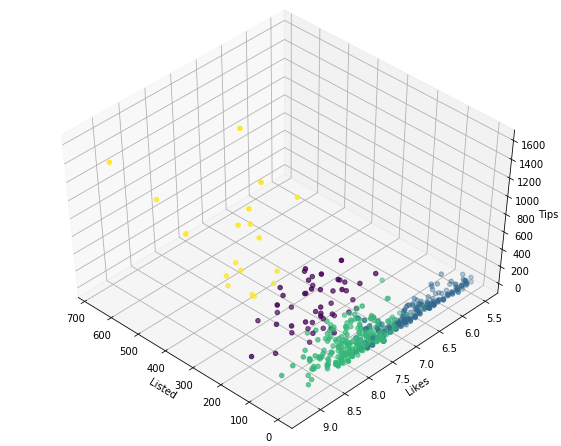

In [635]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Likes', fontsize=18)
# plt.xlabel('Listed', fontsize=16)
# plt.zlabel('Tips', fontsize=16)
ax.set_xlabel('Listed')
ax.set_ylabel('Likes')
ax.set_zlabel('Tips')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


## The clusters are distinctly different.  Now find which cluster has the most Michelin restaurants

In [640]:
cluster0_michelin = cluster_labled_stats.loc[(cluster_labled_stats['Labels'] == 0) & (cluster_labled_stats['Michelin'] == 1)]  
cluster1_michelin = cluster_labled_stats.loc[(cluster_labled_stats['Labels'] == 1) & (cluster_labled_stats['Michelin'] == 1)]  
cluster2_michelin = cluster_labled_stats.loc[(cluster_labled_stats['Labels'] == 2) & (cluster_labled_stats['Michelin'] == 1)]  
cluster3_michelin = cluster_labled_stats.loc[(cluster_labled_stats['Labels'] == 3) & (cluster_labled_stats['Michelin'] == 1)]  
print('Distribution of Michelin restaurants: cluster 0 = {} restaurants, cluster 1 = {} restaurants, cluster 2 = {} restaurants, cluster 3 = {} restaurants'\
      .format(len(cluster0_michelin),len(cluster1_michelin),len(cluster2_michelin),len(cluster3_michelin),len(cluster4_michelin)))


Distribution of Michelin restaurants: cluster 0 = 19 restaurants, cluster 1 = 23 restaurants, cluster 2 = 36 restaurants, cluster 3 = 5 restaurants


In [641]:
Prob_Cluster0 = 0
Prob_Cluster1 = 0
Prob_Cluster2 = 0
Prob_Cluster3 = 0

In [669]:
ttl_restaurants = len(cluster_labled_stats)
Prob_Cluster0 = len(cluster0_michelin)/len(cluster_labled_stats.loc[(cluster_labled_stats['Labels'] == 0)])
Prob_Cluster1 = len(cluster1_michelin)/len(cluster_labled_stats.loc[(cluster_labled_stats['Labels'] == 1)])
Prob_Cluster2 = len(cluster2_michelin)/len(cluster_labled_stats.loc[(cluster_labled_stats['Labels'] == 2)])
Prob_Cluster3 = len(cluster3_michelin)/len(cluster_labled_stats.loc[(cluster_labled_stats['Labels'] == 3)])
print('Share of Michelin restaurant: Cluster 0 is {}, Cluster 1 is {}, Cluster 2 is {}, Cluster 3 is {}'\
      .format(round(Prob_Cluster0,2), round(Prob_Cluster1,2), round(Prob_Cluster2,2), round(Prob_Cluster3,2))) 

Share of Michelin restaurant: Cluster 0 is 0.39, Cluster 1 is 0.11, Cluster 2 is 0.13, Cluster 3 is 0.28


## Cluster 0 clearly has the most Michelin restaurants.  39% (19 out of the 49) of the restaurants already earned a Michelin award.

## The rest 30 restaurants in Cluster 0 are the "Michelin quality" restaurants! 

In [648]:
michelin_quality_list = cluster_labled_stats.loc[(cluster_labled_stats['Labels'] == 0) & (cluster_labled_stats['Michelin'] == 0)]  
print(michelin_quality_list.shape)
michelin_quality_list

(30, 10)


,Name,Rating,Likes,Tips,Photos,Listed,Price Level,Labels,Michelin,Area
124,Under Bridge Spicy Crab (Under Bridge Spicy Cr...,7.8,119,40,361,260,3.0,0,0,Wanchai
131,DimDimSum Dim Sum Specialty Store (點點心點心專門店),8.3,201,99,470,344,2.0,0,0,Hong_Kong
139,Fook Lam Moon (福臨門),7.5,81,44,266,295,1.8,0,0,Wanchai
142,Chuen Kee Seafood Restaurant (全記海鮮菜館),7.4,88,21,508,61,3.0,0,0,Sai_Kung
167,Sea View Congee Shop (海景粥店),8.1,104,38,381,218,1.8,0,0,Kowloon
168,DimDimSum Dim Sum Specialty Store (點點心點心專門店),8.0,173,103,442,279,2.0,0,0,Mong_Kok
189,Din Tai Fung (鼎泰豐),8.9,124,27,163,211,1.0,0,0,Tsim_Sha_Tsui
200,Tapas Bar,8.1,57,87,245,32,3.0,0,0,NaN
206,Ichiran (一蘭),8.6,120,26,384,151,1.8,0,0,Tsim_Sha_Tsui
230,Ippudo (一風堂),8.0,121,58,763,271,1.8,0,0,Tsim_Sha_Tsui


### There are still many Michelin awarded restaurants in cluster 1, 2, 3, which are not accounted for in cluster 0.
### Let's use Logistics Regression to help predict restaurants in these other clusters and beyond.

## X. The Logistics Regression Model

### Analyze the data using logistics regression and evaluate the model's accuracy

In [666]:
print(all_stats.shape)
all_stats.head()

(567, 10)


,Name,Cuisine,Rating,Likes,Tips,Photos,Listed,Price Level,Area,Michelin
0,Loaf On (六福菜館),Chinese Restaurant,8.5,42,22,129,127,1.0,Sai_Kung,1
1,Lei Garden Restaurant (利苑酒家),Chinese Restaurant,7.4,14,5,41,7,1.0,Kwun_Tong,1
2,Tim Ho Wan (添好運),Dim Sum Restaurant,8.2,300,135,902,804,2.0,Sham Shui Po,1
3,Ming Court (明閣),Cantonese Restaurant,7.7,74,49,309,219,1.8,Mong Kok,1
4,Yat Tung Heen (逸東軒),Cantonese Restaurant,6.9,18,13,77,19,1.8,Yau_Ma_Tei,1


In [671]:
log_stats = all_stats.drop(['Area','Cuisine'],axis=1)
print(log_stats.shape)
log_stats.head()

(567, 8)


,Name,Rating,Likes,Tips,Photos,Listed,Price Level,Michelin
0,Loaf On (六福菜館),8.5,42,22,129,127,1.0,1
1,Lei Garden Restaurant (利苑酒家),7.4,14,5,41,7,1.0,1
2,Tim Ho Wan (添好運),8.2,300,135,902,804,2.0,1
3,Ming Court (明閣),7.7,74,49,309,219,1.8,1
4,Yat Tung Heen (逸東軒),6.9,18,13,77,19,1.8,1


In [652]:
X = np.asarray(log_stats[['Rating', 'Likes', 'Tips', 'Photos', 'Listed', 'Price Level']])
X[0:5]

array([[  8.5,  42. ,  22. , 129. , 127. ,   1. ],
       [  7.4,  14. ,   5. ,  41. ,   7. ,   1. ],
       [  8.2, 300. , 135. , 902. , 804. ,   2. ],
       [  7.7,  74. ,  49. , 309. , 219. ,   1.8],
       [  6.9,  18. ,  13. ,  77. ,  19. ,   1.8]])

In [653]:
y = np.asarray(log_stats['Michelin'])
y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

Also, we normalize the dataset:

In [654]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.37e+00,  2.50e-02,  1.10e-01, -9.61e-03,  2.40e-01, -1.42e+00],
       [ 2.85e-03, -3.68e-01, -4.34e-01, -4.68e-01, -4.18e-01, -1.42e+00],
       [ 9.99e-01,  3.64e+00,  3.72e+00,  4.02e+00,  3.95e+00,  3.23e-01],
       [ 3.76e-01,  4.74e-01,  9.73e-01,  9.28e-01,  7.44e-01, -2.45e-02],
       [-6.19e-01, -3.11e-01, -1.78e-01, -2.80e-01, -3.52e-01, -2.45e-02]])

## Train/Test dataset

Okay, we split our dataset into train and test set:

In [655]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (453, 6) (453,)
Test set: (114, 6) (114,)


<h2 id="modeling">Modeling Logistic Regression</h2>

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [672]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Now we can predict using our test set:

In [673]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [674]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:8]

array([[0.84, 0.16],
       [0.8 , 0.2 ],
       [0.87, 0.13],
       [0.9 , 0.1 ],
       [0.88, 0.12],
       [0.87, 0.13],
       [0.83, 0.17],
       [0.87, 0.13]])

### Evaluating the logistics regression model

### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.



In [675]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8596491228070176

### confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [676]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [677]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 1 15]
 [ 1 97]]


Confusion matrix, without normalization
[[ 1 15]
 [ 1 97]]


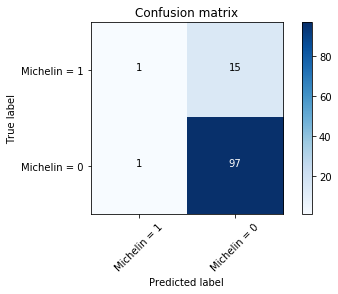

In [678]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Michelin = 1','Michelin = 0'],normalize= False,  title='Confusion matrix')

In [663]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.87      0.99      0.92        98
           1       0.50      0.06      0.11        16

   micro avg       0.86      0.86      0.86       114
   macro avg       0.68      0.53      0.52       114
weighted avg       0.81      0.86      0.81       114



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 


In [664]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.3815676196384555

### The Jaccard index and the F1 score are all above 0.81 which is quite decent.  Log loss is 0.38 which should ideally be lower. 

<a id='item5'></a>